In [ ]:
#Importation des bibliothèques nécéssaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Chargement des données
df_Marseille=pd.read_excel('../donnees/Marseille_regional.xlsx')

In [ ]:
#Convertir lees coplonnes en valeurs numériques
df_Marseille['vitesse']=pd.to_numeric(df_Marseille['vitesse'], errors='coerce')
df_Marseille['humidité']=pd.to_numeric(df_Marseille['humidité'], errors='coerce')
df_Marseille['pression']=pd.to_numeric(df_Marseille['pression'], errors='coerce')
df_Marseille['température']=pd.to_numeric(df_Marseille['température'], errors='coerce')

In [ ]:
#Détermination de la matrice des variables
X=df_Marseille[['vitesse', 'humidité','pression','température']]

In [ ]:
#Standarisation des variables
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [ ]:
df_PR=pd.read_excel('../donnees/V_PR.xlsx')

In [ ]:
#Convertion des colonnes en valeurs numériques
df_PR['vitesse']=pd.to_numeric(df_PR['vitesse'], errors='coerce')
Y=df_PR['vitesse']

In [ ]:
#Séparation des données de l'entrainement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

In [ ]:
#Création du modèle
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#Application sur les données test
Y_predict=model.predict(X_test)

In [ ]:
#Evaluation du modèle
from sklearn.metrics import r2_score, mean_absolute_error
R2=r2_score(Y_test, Y_predict)
MSE=mean_absolute_error(Y_test, Y_predict)
print(f"R2={R2:.3f}, MSE={MSE:.3f}")

R2=0.961, MSE=1.257


In [ ]:
#Relation entre les valeurs prédites et réelles
a , b =np.polyfit(Y_test, Y_predict, deg=1)
y=a*Y_test+b

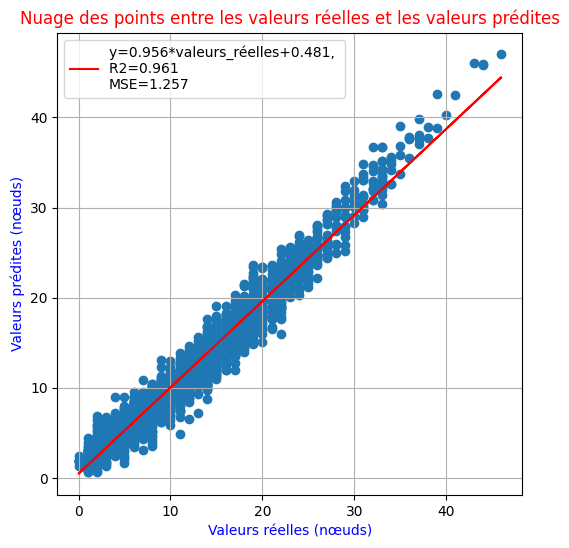

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(Y_test, Y_predict)
plt.plot(Y_test, y, label=f"y={a:.3f}*valeurs_réelles+{b:.3f}, \nR2={R2:.3f} \nMSE={MSE:.3f}", color='r')
plt.xlabel('Valeurs réelles (nœuds)', color='b')
plt.ylabel('Valeurs prédites (nœuds)', color='b')
plt.title('Nuage des points entre les valeurs réelles et les valeurs prédites', color='r')
plt.grid('True')
plt.legend()